In [6]:
from __future__ import print_function
import pylab as pl
import json
import urllib as urllib
import pandas as pd
import numpy as np
import os
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [7]:
os.getenv('PUIDATA')

'/home/cusp/nm2565/PUIdata'

In [8]:
get_ipython().system("curl -O 'https://data.cityofnewyork.us/api/views/2pmt-skyq/rows.csv'")

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8101    0  8101    0     0  22777      0 --:--:-- --:--:-- --:--:--  114k


In [42]:
steam_consumption = pd.read_csv('rows.csv')
steam_consumption.head()

,ZIP,Building type (service class),Consumption (mlbs),Consumption (Mg),Utility/Data Source
0,10048\n,Commercial,72117,32712,ConEd
1,"10001\n(40.75025902143676, -73.99688630375988)",Commercial,13108,5946,ConEd
2,"10003\n(40.73194394755518, -73.98887214913032)",Commercial,7757,3519,ConEd
3,"10002\n(40.71612146793143, -73.98583147024613)",Large Residential,154049,69876,ConEd
4,"10003\n(40.73194394755518, -73.98887214913032)",Large Residential,101042,45832,ConEd


In [43]:
new_zip = [] #create an empty list 
for lm in steam_consumption['ZIP']: #run the for loop so that all the values are included.
    new_zip.append(int(lm[:5])) #I'm taking only the first 5 values
new_zip 

[10048,
 10001,
 10003,
 10002,
 10003,
 10001,
 10002,
 10001,
 10004,
 10003,
 10001,
 10002,
 10003,
 10021,
 10022,
 10013,
 10036,
 10014,
 10011,
 10005,
 10017,
 10022,
 10014,
 10019,
 10006,
 10016,
 10028,
 10128,
 10038,
 10016,
 10028,
 10036,
 10009,
 10006,
 10017,
 10012,
 10019,
 10036,
 10006,
 10011,
 10035,
 10014,
 10013,
 10020,
 10004,
 10021,
 10010,
 10016,
 10020,
 10012,
 10023,
 10021,
 10017,
 10038,
 10005,
 10009,
 10036,
 10024,
 10020,
 10009,
 10007,
 10018,
 10013,
 10022,
 10028,
 10025,
 10021,
 10033,
 10007,
 10026,
 10019,
 10019,
 10019,
 10005,
 10018,
 10024,
 10011,
 10022,
 10010,
 10038,
 10007,
 10023,
 10065,
 10004,
 10012,
 10010,
 10065,
 10024,
 10023,
 10017,
 10075,
 10009,
 10018,
 10022,
 10065,
 10011,
 10004,
 10075,
 10065,
 10075,
 10025,
 10017]

In [44]:
steam_consumption['ZIP'] = new_zip #replacing the values

In [45]:
steam_consumption.head()

,ZIP,Building type (service class),Consumption (mlbs),Consumption (Mg),Utility/Data Source
0,10048,Commercial,72117,32712,ConEd
1,10001,Commercial,13108,5946,ConEd
2,10003,Commercial,7757,3519,ConEd
3,10002,Large Residential,154049,69876,ConEd
4,10003,Large Residential,101042,45832,ConEd


In [46]:
steam_consumption.columns

Index([u'ZIP', u'Building type (service class)', u' Consumption (mlbs) ',
       u' Consumption (Mg) ', u'Utility/Data Source'],
      dtype='object')

In [47]:
steam_consumption.drop([' Consumption (Mg) ','Utility/Data Source'], axis=1, inplace=True)
steam_consumption.dropna(inplace = True)

In [48]:
steam_consumption.head()

,ZIP,Building type (service class),Consumption (mlbs)
0,10048,Commercial,72117
1,10001,Commercial,13108
2,10003,Commercial,7757
3,10002,Large Residential,154049
4,10003,Large Residential,101042


In [50]:
borough = {10026: 'Manhattan', 10027: 'Manhattan', 10030: 'Manhattan', 10037: 'Manhattan', 10039: 'Manhattan', 
           10001: 'Manhattan', 10011: 'Manhattan', 10018: 'Manhattan', 10019: 'Manhattan', 10020: 'Manhattan', 
           10036: 'Manhattan', 10029: 'Manhattan', 10035: 'Manhattan', 10010: 'Manhattan', 10016: 'Manhattan', 
           10017: 'Manhattan', 10022: 'Manhattan', 10012: 'Manhattan', 10013: 'Manhattan', 10014: 'Manhattan', 
           10004: 'Manhattan', 10005: 'Manhattan', 10006: 'Manhattan', 10007: 'Manhattan', 10038: 'Manhattan', 
           10280: 'Manhattan', 10002: 'Manhattan', 10003: 'Manhattan', 10009: 'Manhattan', 10021: 'Manhattan', 
           10028: 'Manhattan', 10044: 'Manhattan', 10065: 'Manhattan', 10075: 'Manhattan', 10128: 'Manhattan', 
           10023: 'Manhattan', 10024: 'Manhattan', 10025: 'Manhattan', 10031: 'Manhattan', 10032: 'Manhattan', 
           10033: 'Manhattan', 10034: 'Manhattan', 10040: 'Manhattan'}

In [55]:
steam_consumption['Borough'] = steam_consumption['ZIP'].map(borough)

In [67]:
#steam_consumption1 = pd.DataFrame(steam_consumption[' Consumption (mlbs) '].groupby([steam_consumption['ZIP'], 
                                                                                     #steam_consumption['Building type (service class)'], 
                                                                                     #steam_consumption['Borough']]).mean())
        #I would have used this to calculate the mean of all the values of any one particular zip code

In [71]:
steam_consumption1 = steam_consumption1[(steam_consumption1['Building type (service class)'] == "Commercial")]
#taking the value of only the commercial units

In [72]:
steam_consumption1.reset_index(inplace=True)
steam_consumption1.head()

,level_0,index,ZIP,Building type (service class),Borough,Consumption (mlbs)
0,0,0,10001,Commercial,Manhattan,74442.000000
1,2,2,10002,Commercial,Manhattan,53964.500000
2,4,4,10003,Commercial,Manhattan,68233.666667
3,6,6,10004,Commercial,Manhattan,104284.333333
4,8,8,10005,Commercial,Manhattan,17028.000000


AttributeError: 'AxesSubplot' object has no attribute 'ylim'

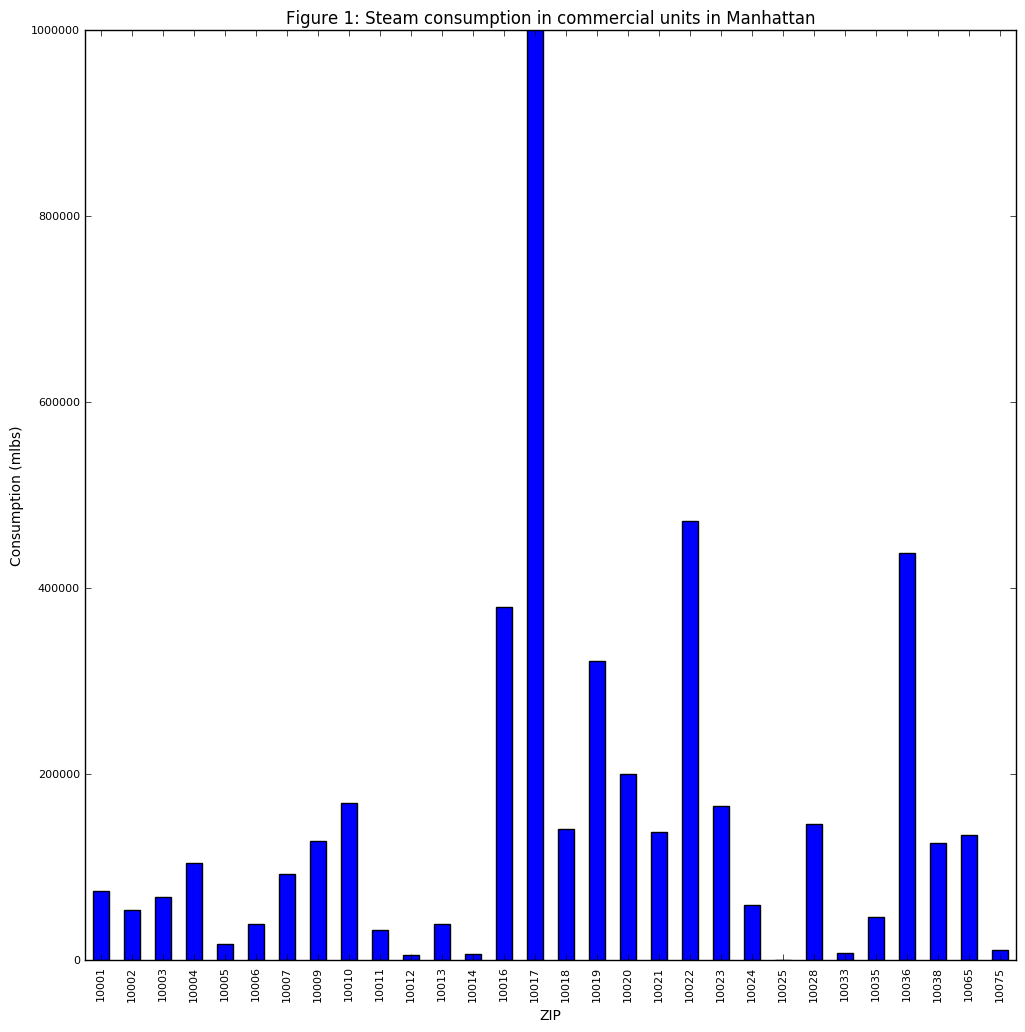

In [83]:
ax = steam_consumption1.plot(x='ZIP', y=' Consumption (mlbs) ', kind='bar', figsize=(12,12), legend=False, fontsize=8, color='Blue', ylim = [0,1000000])
ax.set_title('Figure 1: Steam consumption in commercial units in Manhattan', fontsize=12)
ax.set_ylabel('Consumption (mlbs)', fontsize=10)
ax.ylim(0,1000000)
ax.set_xlabel('Zip Code', fontsize=10)

Figure 1: The bar graph above represents the steam consumption in the commericial buildings in Manhattan for the year in 2010. This data was extracted from Open NYC website and proves that the maximum steam consumption in Manhattan is in Murray Hill (Zip code 10017) in midtown Manhattan. 